# Sprawozdanie z MIO laboratorium 02 - Marcin Knapczyk

#Zadanie 1
Proszę stworzyć zestaw punktów należących do dwóch klas: K1 i K2. Punkty z klasy K1 powinny być losowane z rozkładu normalnego o średniej [0, -1] i wariancji 1. Punkty z klasy K2 powinny pochodzić z rozkładu normalnego o średniej [1, 1] i wariancji 1. Całościowo zbiór powinien zawierać 200 punktów.
Należy wybrać zbiory uczące o następującej liczebności: 5, 10, 20 oraz 100. Dla każdego wariantu podziału znalezy znaleźć równanie prostej, która najlepiej oddziela klasy K1 i K2. Uzyskaną prostą należy zaprezentować razem z punktami testowymi i linią (hiperpłaszczyzną), która oddziela klasy. Następnie należy ocenić to jak dobrze klasyfikator działa od proporcji danych uczących i testujących.

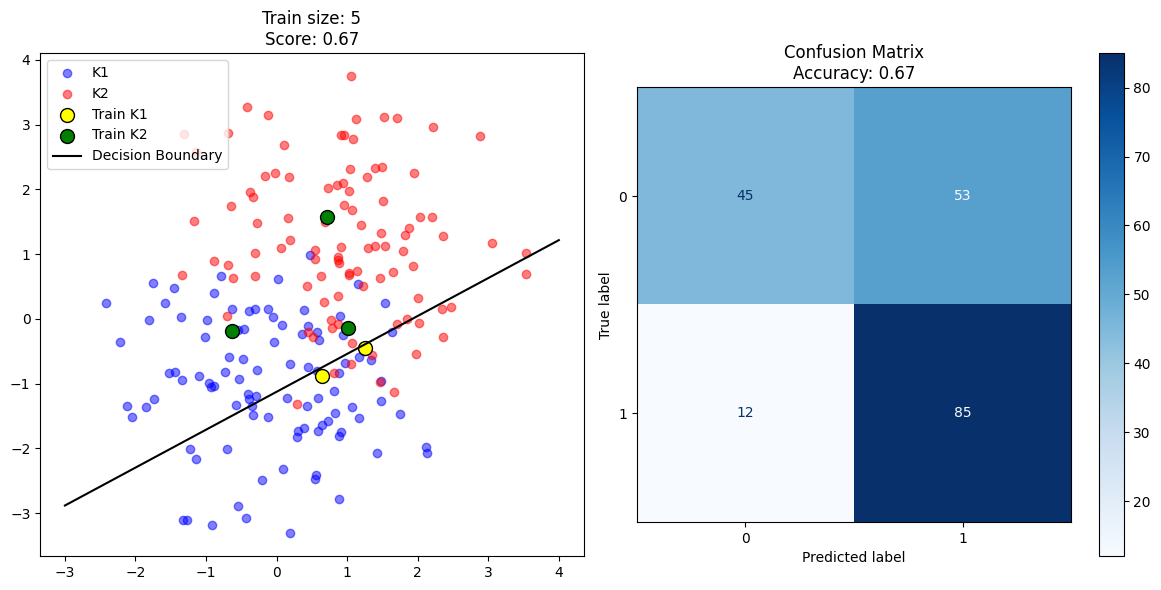

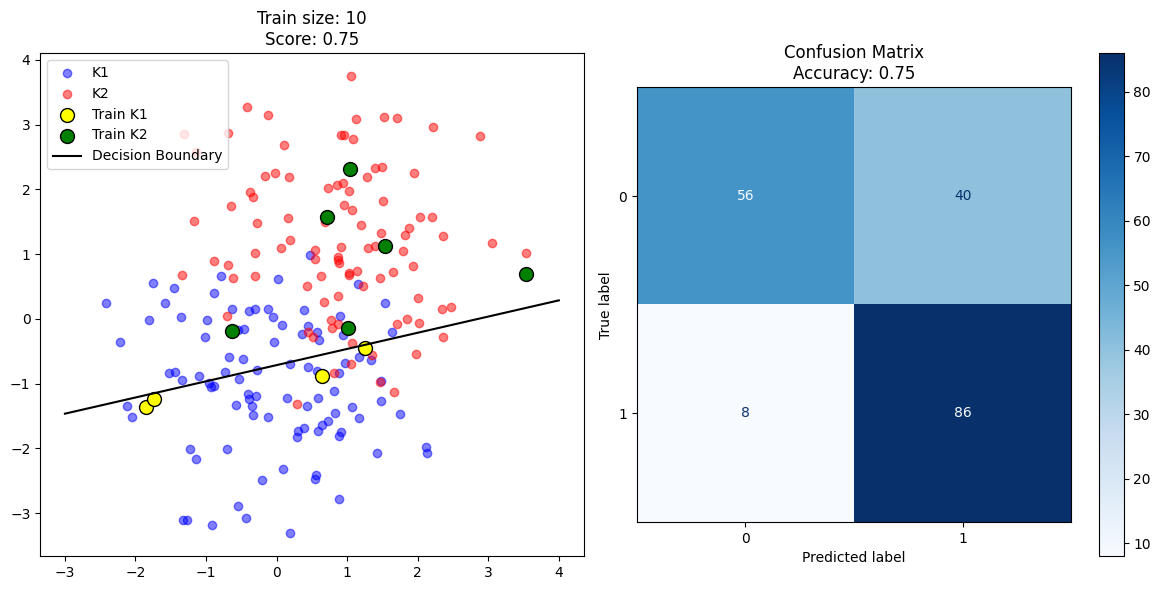

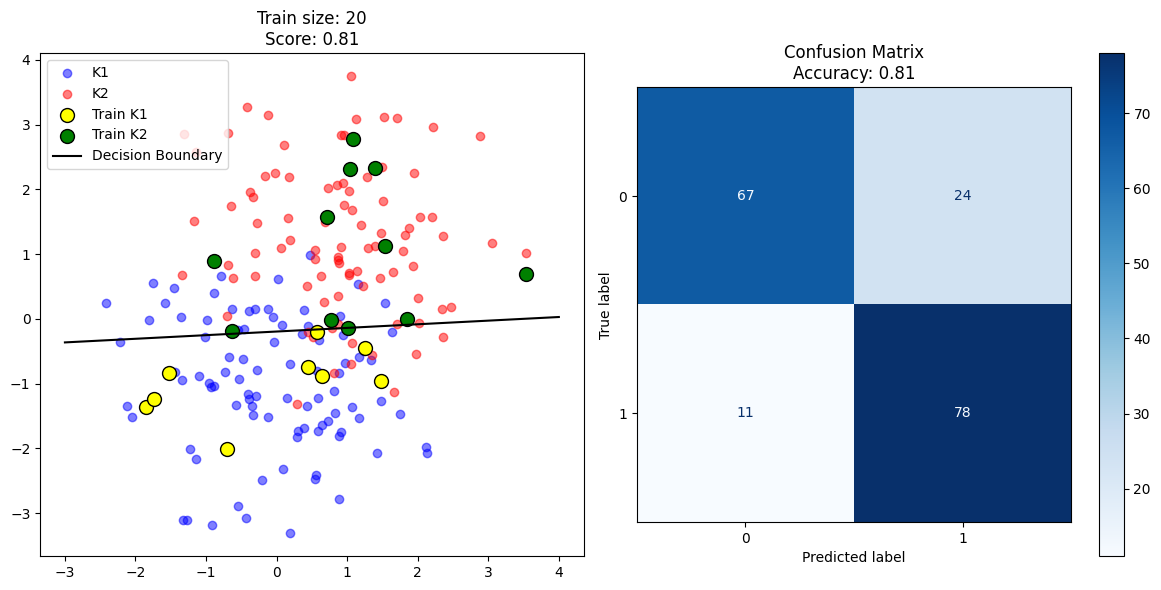

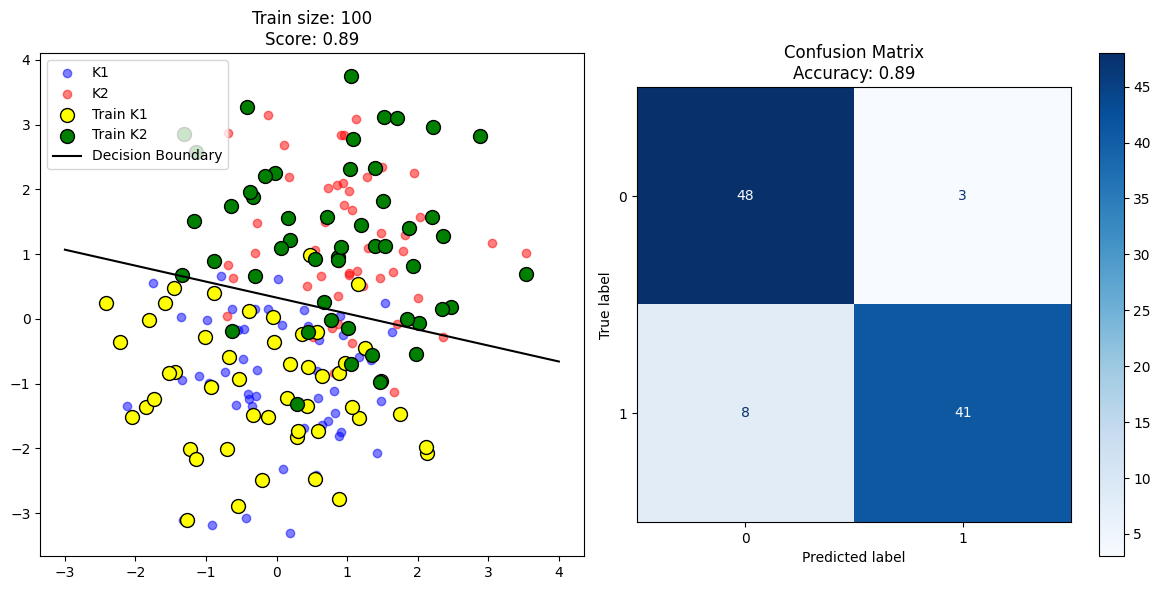

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

n_samples = 200
class_sizes = n_samples // 2

# tworzenie losowych punktów o zadanych parametrach
K1 = np.random.normal([0, -1], 1, (100, 2))
K2 = np.random.normal([1, 1], 1, (100, 2))

X = np.vstack((K1, K2))
y = np.hstack((np.zeros(class_sizes), np.ones(class_sizes)))

train_sizes = [5, 10, 20, 100]

for train_size in train_sizes:
    # podział punktów na dane do trenowania i testujące
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    # trenowanie perceptronu
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
    perceptron.fit(X_train, y_train)

    y_pred = perceptron.predict(X_test)
    score = perceptron.score(X_test, y_test)

    w = perceptron.coef_[0]
    b = perceptron.intercept_

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # plotowanie punktów
    ax = axes[0]
    ax.scatter(K1[:, 0], K1[:, 1], color='blue', label="K1", alpha=0.5)
    ax.scatter(K2[:, 0], K2[:, 1], color='red', label="K2", alpha=0.5)

    # plotowanie punktów trenujących
    X_train_K1 = X_train[y_train == 0]
    X_train_K2 = X_train[y_train == 1]
    ax.scatter(X_train_K1[:, 0], X_train_K1[:, 1], facecolors='yellow', edgecolors='black', s=100, label="Train K1")
    ax.scatter(X_train_K2[:, 0], X_train_K2[:, 1], facecolors='green', edgecolors='black', s=100, label="Train K2")

    # wyznaczanie i plotowanie linii podziału między klasami
    x_vals = np.linspace(-3, 4, 100)
    y_vals = -(w[0] * x_vals + b) / w[1]
    ax.plot(x_vals, y_vals, 'k-', label="Decision Boundary")

    ax.set_title(f"Train size: {train_size}\nScore: {score:.2f}")
    ax.legend()

    # tworzenie i plotowanie macierzy błędów
    cm = confusion_matrix(y_test, y_pred)
    cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    cm_disp.plot(ax=axes[1], values_format='d', cmap='Blues')
    axes[1].set_title(f"Confusion Matrix\nAccuracy: {(cm[0, 0] + cm[1, 1]) / np.sum(cm):.2f}")

    plt.tight_layout()
    plt.show()


## Wnioski:

*   Zwiększenie liczby danych trenujących skutkuje zwiększeniem poprawności klasyfikacji
*   Dla mniejszych zbiorów danych trenujących (5, 10), linia podziału wyznaczona przez perceptron dzieli punkty na klasy bardzo niedokładnie, co skutkuje niskim wynikiem klasyfikacji
*   Dla 100 punktów użytych w procesie trenowania, linia podziału oddziela obie klasy dosyć dokładnie, co skutkuje zadowalającym wynikiem na poziomie 0.89
*   Losowe generowanie punktów może wpływać na dokładność klasyfikacji między kolejnymi uruchomieniami programu. Nie zmienia to jednak tendencji wzrostu skuteczności wraz ze zwiększeniem ilości danych uczących








#Zadanie 2

Analiza próbek benzyny wykazała że może ona być przypisana do dwóch klas czystości A i B (dla potrzeb zadania można je oznaczyć 0 i 1). Proszę skorzystać z pliku fuel.txt, w którym pierwsze trzy kolumny to właściwości fizykochemiczne próbek, czwarta kolumna - klasa czystości.

Proszę sprawdzić skuteczność sieci opartej o pojedynczy neuron do klasyfikacji w tym problemie, porównując wyniki dla pięciokrotnego uczenia sieci. Proszę potraktować wszystkie dane jako dane uczące.

In [ ]:
import pandas as pd

fuel_data = pd.read_csv('fuel.txt')
# zamiana labeli A, B na 0, 1
fuel_data['purity_class'] = fuel_data['purity_class'].map({"A": 0, "B": 1})
fuel_data.head(5)

,c_1,c_2,c_3,purity_class
0,645.795,0.151,155.570,1
1,1334.246,0.022,154.000,1
2,1102.023,0.122,155.495,1
3,316.575,0.070,152.951,1
4,-427.025,0.199,150.674,0


In [ ]:
fuel_data.describe()

,c_1,c_2,c_3,purity_class
count,100.000000,100.000000,100.000000,100.000000
mean,176.065680,0.109290,153.234780,0.580000
std,1160.661926,0.111488,1.771874,0.496045
min,-2049.388000,-0.099000,150.050000,0.000000
25%,-642.725500,0.017000,151.750250,0.000000
50%,303.505500,0.117000,153.499000,1.000000
75%,1131.594500,0.195250,154.772750,1.000000
max,2108.619000,0.299000,155.974000,1.000000


Dane można podzielić na trzy cechy oraz etykietę (purity_class). Charakteryzują się one dużą rozpiętością wartości (odchylenie standardowe cechy c_1 na poziomie 1160 przy średniej wartości wynoszącej ok. 176). Należy zatem dokonać ich normalizacji.

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# podział danych na cechy i etykiety
X = fuel_data.iloc[:, :-1].values  # pierwsze trzy kolumny jako cechy
y = fuel_data.iloc[:, -1].values   # ostatnia kolumna jako etykieta

# normalizacja danych
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# trenowanie i testowanie modelu 5 razy
accuracies = []
for i in range(5):
    perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=i)
    perceptron.fit(X_scaled, y)
    y_pred = perceptron.predict(X_scaled)

    acc = accuracy_score(y, y_pred)
    accuracies.append(acc)
    print(f'Iteracja {i+1}, dokładność: {acc:.4f}')

print(f'Średnia dokładność: {np.mean(accuracies):.4f}')

Iteracja 1, dokładność: 0.9700
Iteracja 2, dokładność: 1.0000
Iteracja 3, dokładność: 1.0000
Iteracja 4, dokładność: 1.0000
Iteracja 5, dokładność: 1.0000
Średnia dokładność: 0.9940


## Wnioski:

*   Klasyfikacja charakteryzuje się wysoką skutecznością w każdej iteracji, średnia dokładność dla pięciu iteracji wynosi 0.994, czyli blisko 100%
*   Świadczy to o wysokiej liniowości podziału klas czystości w zbiorze danych - perceptron był w stanie odpowiednio rozdzielić klasy za pomocą linii prostej

#Zadanie 3
Proszę pobrać zbiór https://archive.ics.uci.edu/ml/datasets/iris. Można to też zrobić w pythonie używając funkcji sklearn.datasets.load_iris(). Następnie proszę dokonać samodzielnego podziału na dane uczące i testujące w proporcji 80%/20%. Proszę zbudować sieć złożoną z pojedynczej warstwy perceptronów (np. używając omawianej już tutaj funkcji sklearn.linear_model.Perceptron), której zadaniem będzie jak najdokładniejsza klasyfikacja gatunków irysów na podstawie ich pomiarów. Proszę dokonać analizy macierzy pomyłek dla kilku uruchomień algorytmu. Zachęcam do rozważenia pytania: jaką największą trafność jest w stanie uzyskać w klasyfikacji irysów z podanego zbioru pojedyncza warstwa perceptronów? Dlaczego? (Podpowiedź: polecamy przyjrzeć się pojęciu liniowej separowalności)

In [ ]:
from sklearn.datasets import load_iris

# wczytanie zbioru danych Iris
data = load_iris()
X, y = data.data, data.target

Dane w zbiorze składają się z 4 wartości opisujących cechy kwiatów. Podzielone są na trzy klasy: Iris Setosa, Iris Versicolour oraz Iris Virginica.

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# utworzenie sieci złożonej z pojedynczej warstwy perceptronów
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)

accuracies = []
for x in range(10):
  # podział danych na zbiór uczący i testowy (80% / 20%)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  # trenowanie perceptronu
  perceptron.fit(X_train, y_train)

  y_pred = perceptron.predict(X_test)

  # utworzenie i wyświetlenie macierzy błędów
  cm = confusion_matrix(y_test, y_pred)
  accuracy = (cm[0, 0] + cm[1, 1] + cm[2, 2]) / np.sum(cm)
  accuracies.append(accuracy)

  print(f"Iteracja: {x}\nDokładność klasyfikacji: {accuracy:.2f}")
  print("Macierz błędów:")
  print(cm)


print(f"Największa dokładność: {max(accuracies)}")
print(f"Średnia dokładność: {np.mean(accuracies)}")


Iteracja: 0
Dokładność klasyfikacji: 1.00
Macierz błędów:
[[10  0  0]
 [ 0  8  0]
 [ 0  0 12]]
Iteracja: 1
Dokładność klasyfikacji: 0.67
Macierz błędów:
[[10  0  0]
 [ 8  0  2]
 [ 0  0 10]]
Iteracja: 2
Dokładność klasyfikacji: 0.60
Macierz błędów:
[[11  0  0]
 [ 1  7  0]
 [ 1 10  0]]
Iteracja: 3
Dokładność klasyfikacji: 0.80
Macierz błędów:
[[14  0  0]
 [ 3  0  3]
 [ 0  0 10]]
Iteracja: 4
Dokładność klasyfikacji: 0.97
Macierz błędów:
[[ 7  0  0]
 [ 1 12  0]
 [ 0  0 10]]
Iteracja: 5
Dokładność klasyfikacji: 0.60
Macierz błędów:
[[ 7  0  0]
 [10  0  2]
 [ 0  0 11]]
Iteracja: 6
Dokładność klasyfikacji: 0.87
Macierz błędów:
[[11  0  0]
 [ 1  7  0]
 [ 0  3  8]]
Iteracja: 7
Dokładność klasyfikacji: 0.63
Macierz błędów:
[[13  0  0]
 [ 1  1 10]
 [ 0  0  5]]
Iteracja: 8
Dokładność klasyfikacji: 0.70
Macierz błędów:
[[ 8  0  0]
 [ 6  3  3]
 [ 0  0 10]]
Iteracja: 9
Dokładność klasyfikacji: 0.97
Macierz błędów:
[[12  0  0]
 [ 0  5  1]
 [ 0  0 12]]
Największa dokładność: 1.0
Średnia dokładność: 0.7

## Wnioski:
*   Maksymalna dokładność sieci wyniosła 1.0, co świadczy o bezbłędnym dopasowaniu wszystkich danych testowych
*   Średnia dokładność jest jednak znacznie niższa, czasami spada nawet do 0.63
*   Perceptron jest modelem liniowym, zatem skuteczność klasyfikacji za pomocą sieci składającej się z perceptronów zależy w dużym stopniu od liniowej separowalności danych w zbiorze
*   Jeśli dane nie są liniowo separowalne, pojedyncza warstwa perceptronów nie osiągnie 100% dokładności
*   Duża zmienność dokładności może świadczyć o różnym stopniu separowalności liniowej pośród klas znajdujących się w zbiorze danych
*   Analizując macierze pomyłek można zauważyć, że stosunkowo często mylone są klasy 2 i 3 (Iris Versicolour i Iris Virginica), co może świadczyć o ich niskiej separowalności liniowej
*   Klasa 1 (Iris Setosa) jest najczęściej klasyfikowana poprawnie, co świadczy o jej dobrym odseparowaniu od reszty klas w zbiorze

# Zadanie 4
Proszę spróbować podzielić zbiór irysów na zbiór uczący i testujący na co najmniej 3 różne sposoby. Jak duży jest wpływ podziału na wynik?

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# wczytanie zbioru danych Iris
data = load_iris()
X, y = data.data, data.target

# różne wielkości zbioru danych uczących
train_sizes = [0.8, 0.7, 0.6, 0.5]
accuracies = []

for train_size in train_sizes:
  # podział zbioru na dane uczące i testowe
  X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)

  # utworzenie i uczenie perceptronu
  perceptron = Perceptron(max_iter=1000, tol=1e-4, random_state=42)
  perceptron.fit(X_train, y_train)

  # obliczenie dokładności klasyfikacji
  accuracy = perceptron.score(X_test, y_test)
  print(f"Wielkość zbioru danych uczących: {train_size}\nDokładność: {accuracy}\n")
  accuracies.append(accuracy)


Wielkość zbioru danych uczących: 0.8
Dokładność: 0.7

Wielkość zbioru danych uczących: 0.7
Dokładność: 0.8222222222222222

Wielkość zbioru danych uczących: 0.6
Dokładność: 0.9

Wielkość zbioru danych uczących: 0.5
Dokładność: 0.5733333333333334



## Wnioski:
*   Dokładność klasyfikacji przy użyciu perceptronu zależy od sposobu podziału danych na zbiory treningowe i testowe
*   Najwyższą dokładność uzyskano dla zbioru uczącego  0.6, natomiast najniższą dla zbioru uczącego 0.5
*   Wyniki sugerują, że odpowiedni podział danych znacząco wpływa na skuteczność modelu
*   Dokładność klasyfikacji jest ograniczona przez liniową separowalność danych
*   Większa ilość danych uczących wpływa na lepsze wyszkolenie modelu
*   Większa ilość danych testowych pozwala na dokładniejszą ocenę klasyfikacji

# Zadanie 5
Proszę sprawdzić wpływ ilości epok na poprawność klasyfikacji zbioru irysów z poprzednich zadań, dla wybranych ilości epok (polecamy spróbować od jak najmniejszej, np. od 1 lub 2 epok). Żeby zapobiec wcześniejszemu przerywaniu uczenia, w pakiecie Sklearn można ustalić argument tol na odpowiednio małą liczbę czy ustawiając argument early_stopping na False. Można też zamiast tego (lub dodatkowo) nie wyłączać tych kryteriów i zamiast tego prawdzić wartość ilość faktycznych epok potrzebnych do ich osiągnięcia (n_iter_) Proszę przedstawić wnioski, np. na wykresie zależności średniej trafności klasyfikacji na zbiorze testującym w zależności od liczby epok.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

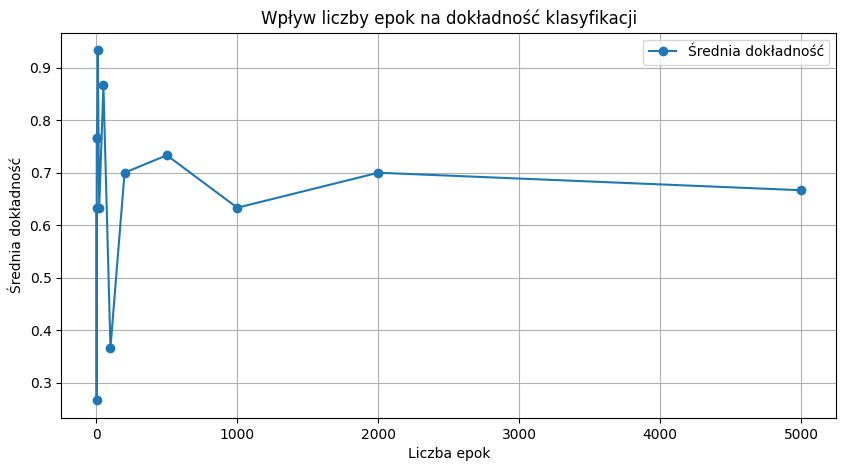

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split

# wczytanie zbioru danych Iris
data = load_iris()
X, y = data.data, data.target

# różne liczby epok do przetestowania
epochs = [1, 2, 3, 5, 10, 20, 50, 100, 200, 500, 1000, 2000, 5000]
accuracies = []

for epoch in epochs:
    # podział zbioru na dane uczące i testowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

    # tworzenie i trenowanie perceptronu
    perceptron = Perceptron(max_iter=epoch, tol=1e-6, early_stopping=False, random_state=42)
    perceptron.fit(X_train, y_train)

    # obliczenie dokładności
    accuracies.append(perceptron.score(X_test, y_test))

# wykres zależności średniej dokładności od liczby epok
plt.figure(figsize=(10, 5))
plt.plot(epochs, accuracies, marker='o', label='Średnia dokładność')
plt.xlabel('Liczba epok')
plt.ylabel('Średnia dokładność')
plt.title('Wpływ liczby epok na dokładność klasyfikacji')
plt.legend()
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

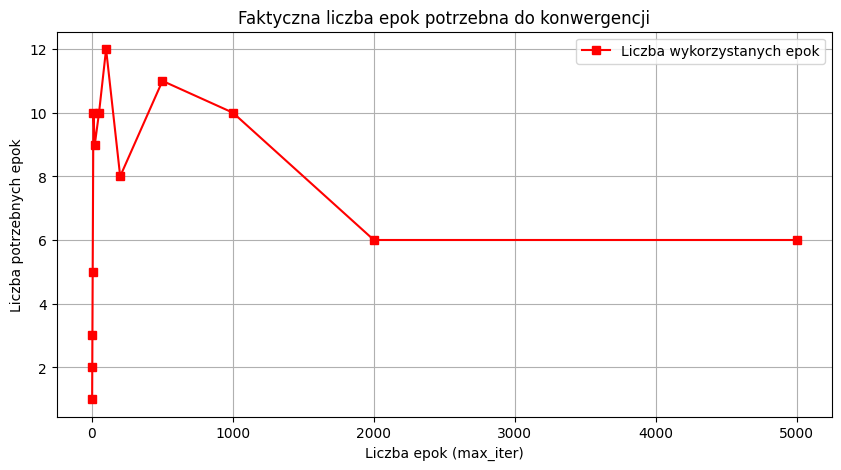

In [ ]:
epochs_needed = []

for epoch in epochs:
    # podział zbioru na dane uczące i testowe
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

    # tworzenie i trenowanie perceptronu
    perceptron = Perceptron(max_iter=epoch, tol=1e-6, early_stopping=True, random_state=42)
    perceptron.fit(X_train, y_train)

    # wyznaczenie wykorzystanych epok
    epochs_needed.append(perceptron.n_iter_)

# wykres liczby faktycznie wykorzystanych epok
plt.figure(figsize=(10, 5))
plt.plot(epochs, epochs_needed, marker='s', color='r', label='Liczba wykorzystanych epok')
plt.xlabel('Liczba epok (max_iter)')
plt.ylabel('Liczba potrzebnych epok')
plt.title('Faktyczna liczba epok potrzebna do konwergencji')
plt.legend()
plt.grid()
plt.show()


## Wnioski:
*   Dokładność klasyfikacji rośnie wraz ze wzrostem liczby epok, ale tylko do pewnego momentu
*   Po osiągnięciu optymalnej liczby epok, dalsze zwiększanie ich liczby nie prowadzi do istotnej poprawy wyników
*   Wartości na wykresie mogą się różnić lokalnie, ale ogólny trend pokazuje początkowy wzrost, a następnie stabilizację dokładności

*   Z wykresu liczby epok potrzebnych do konwergencji (n_iter_) wynika, że rzeczywista liczba wymaganych epok jest znacznie niższa niż ustawione max_iter
*   Maksymalna liczba faktycznie wykorzystanych epok wyniosła 12
*   Dla max_iter ustawionego na 2000 lub 5000, średnia liczba epok do konwergencji wynosi tylko około 6
*   To sugeruje, że perceptron zbiega się stosunkowo szybko i nie wymaga dużej liczby epok do osiągnięcia stabilnej dokładności

In [ ]:
!jupyter nbconvert --to html /content/MIO_lab02_report.ipynb

[NbConvertApp] Converting notebook /content/MIO_lab02_report.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 815670 bytes to /content/MIO_lab02_report.html
